https://www.kaggle.com/code/kerimelebilernn-models-for-arrhythmia-classification

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import os

In [3]:
mit_test_data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/mitbih_test.csv')
mit_train_data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/mitbih_train.csv')

In [4]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

X, y = mit_train_data.iloc[:,:-1], mit_train_data.iloc[:,-1]
X, valX, y, valy = train_test_split(X, y, test_size=0.2)
testX, testy = mit_test_data.iloc[:,:-1], mit_test_data.iloc[:,-1]

print('y : \n {0}\n' .format(y))
print('valy : \n {0}\n' .format(valy))
print('testy : \n {0}\n' .format(testy))

y = to_categorical(y)
valy = to_categorical(valy)
testy = to_categorical(testy)

print('y : \n {0}\n' .format(y))
print('valy : \n {0}\n' .format(valy))
print('testy : \n {0}\n' .format(testy))

y : 
 56121    0.0
45458    0.0
76589    2.0
78371    2.0
53943    0.0
        ... 
58292    0.0
39361    0.0
1773     0.0
41257    0.0
15307    0.0
Name: 0.000000000000000000e+00.88, Length: 70042, dtype: float64

valy : 
 19143    0.0
40193    0.0
84403    4.0
32129    0.0
45531    0.0
        ... 
85185    4.0
63980    0.0
71924    0.0
53589    0.0
14947    0.0
Name: 0.000000000000000000e+00.88, Length: 17511, dtype: float64

testy : 
 0        0.0
1        0.0
2        0.0
3        0.0
4        0.0
        ... 
21886    4.0
21887    4.0
21888    4.0
21889    4.0
21890    4.0
Name: 0.000000000000000000e+00.65, Length: 21891, dtype: float64

y : 
 [[1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0.]
 ...
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]]

valy : 
 [[1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1.]
 ...
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]]

testy : 
 [[1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 ...
 [0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1.

In [5]:
print("X shape = {0}" .format(X.shape))
print("y shape = {0}" .format(y.shape))
print("valX shape = {0}" .format(valX.shape))
print("valy shape = {0}" .format(valy.shape))
print("testX shape = {0}" .format(testX.shape))
print("testy shape = {0}" .format(testy.shape))

X shape = (70042, 187)
y shape = (70042, 5)
valX shape = (17511, 187)
valy shape = (17511, 5)
testX shape = (21891, 187)
testy shape = (21891, 5)


## ann 모델

In [15]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout, SimpleRNN

model = Sequential()
model.add(Dense(50, activation='relu', input_dim=187))
model.add(Dense(50, activation='relu'))
model.add(Dense(50, activation='relu'))
model.add(Dense(50, activation='relu'))
model.add(Dense(5, activation='softmax'))

In [7]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 50)                9400      
                                                                 
 dense_1 (Dense)             (None, 50)                2550      
                                                                 
 dense_2 (Dense)             (None, 50)                2550      
                                                                 
 dense_3 (Dense)             (None, 50)                2550      
                                                                 
 dense_4 (Dense)             (None, 5)                 255       
                                                                 
Total params: 17,305
Trainable params: 17,305
Non-trainable params: 0
_________________________________________________________________


In [8]:
history = model.fit(X, y, validation_data=(valX, valy), epochs=20)

Epoch 1/20
2189/2189 [==============================] - 8s 3ms/step - loss: 0.2593 - accuracy: 0.9271 - val_loss: 0.1647 - val_accuracy: 0.9525
Epoch 2/20
2189/2189 [==============================] - 6s 3ms/step - loss: 0.1474 - accuracy: 0.9588 - val_loss: 0.1317 - val_accuracy: 0.9657
Epoch 3/20
2189/2189 [==============================] - 6s 3ms/step - loss: 0.1264 - accuracy: 0.9644 - val_loss: 0.1187 - val_accuracy: 0.9682
Epoch 4/20
2189/2189 [==============================] - 6s 3ms/step - loss: 0.1128 - accuracy: 0.9681 - val_loss: 0.1226 - val_accuracy: 0.9684
Epoch 5/20
2189/2189 [==============================] - 7s 3ms/step - loss: 0.1051 - accuracy: 0.9703 - val_loss: 0.1026 - val_accuracy: 0.9723
Epoch 6/20
2189/2189 [==============================] - 6s 3ms/step - loss: 0.0955 - accuracy: 0.9731 - val_loss: 0.0996 - val_accuracy: 0.9721
Epoch 7/20
2189/2189 [==============================] - 7s 3ms/step - loss: 0.0910 - accuracy: 0.9735 - val_loss: 0.1075 - val_accuracy:

Text(0, 0.5, 'Accuracy')

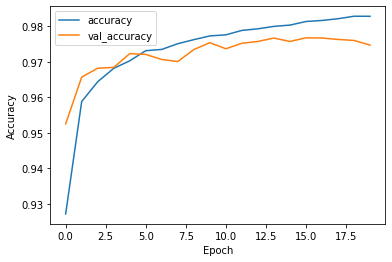

In [9]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['accuracy', 'val_accuracy'])
plt.xlabel('Epoch')
plt.ylabel('Accuracy')

Text(0, 0.5, 'Loss')

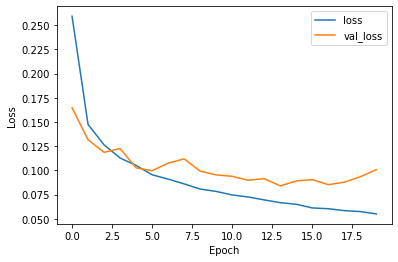

In [10]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['loss', 'val_loss'])
plt.xlabel('Epoch')
plt.ylabel('Loss')

In [12]:
print('Test accuracy : {0:.4f}' .format(model.evaluate(testX, testy)[1]))

685/685 [==============================] - 2s 3ms/step - loss: 0.1026 - accuracy: 0.9738
Test accuracy : 0.9738


## LSTM

In [41]:
from sklearn.utils import shuffle

mit_train_data.iloc[:,187] = mit_train_data.iloc[:,187].astype('int32')
mit_test_data.iloc[:,187] = mit_test_data.iloc[:,187].astype('int32')

X_train = np.array(mit_train_data.iloc[:, :187])
X_test = np.array(mit_test_data.iloc[:, :187])
y_train = np.array(mit_train_data.iloc[:,187])
y_test = np.array(mit_test_data.iloc[:,187])

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

X_train, y_train = shuffle(X_train, y_train, random_state = 101)
X_test, y_test = shuffle(X_test, y_test, random_state = 101)

X_train = np.expand_dims(X_train, 2)
X_test = np.expand_dims(X_test, 2)

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(87553, 187)
(21891, 187)
(87553,)
(21891,)
(87553, 187, 1)
(21891, 187, 1)
(87553, 5)
(21891, 5)


In [47]:
lstm_model = Sequential()
lstm_model.add(LSTM(64, input_shape=(187,1)))
lstm_model.add(Dense(128, activation='relu'))
lstm_model.add(Dropout(0.5))
lstm_model.add(Dense(5, activation='softmax'))

In [48]:
lstm_model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (None, 64)                16896     
                                                                 
 dense_14 (Dense)            (None, 128)               8320      
                                                                 
 dropout_2 (Dropout)         (None, 128)               0         
                                                                 
 dense_15 (Dense)            (None, 5)                 645       
                                                                 
Total params: 25,861
Trainable params: 25,861
Non-trainable params: 0
_________________________________________________________________


In [49]:
lstm_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [51]:
lstm_model_history = lstm_model.fit(X_train, y_train, epochs = 20, batch_size = 100, validation_data = (X_test, y_test))

Epoch 1/20
876/876 [==============================] - 148s 166ms/step - loss: 0.5256 - accuracy: 0.8319 - val_loss: 0.5126 - val_accuracy: 0.8354
Epoch 2/20
876/876 [==============================] - 154s 176ms/step - loss: 0.4584 - accuracy: 0.8652 - val_loss: 0.3711 - val_accuracy: 0.8929
Epoch 3/20
876/876 [==============================] - 145s 166ms/step - loss: 0.3534 - accuracy: 0.8987 - val_loss: 0.3126 - val_accuracy: 0.9027
Epoch 4/20
876/876 [==============================] - 142s 162ms/step - loss: 0.3224 - accuracy: 0.9066 - val_loss: 0.3333 - val_accuracy: 0.9025
Epoch 5/20
876/876 [==============================] - 143s 163ms/step - loss: 0.2900 - accuracy: 0.9151 - val_loss: 0.2613 - val_accuracy: 0.9232
Epoch 6/20
876/876 [==============================] - 144s 165ms/step - loss: 0.2629 - accuracy: 0.9227 - val_loss: 0.2399 - val_accuracy: 0.9245
Epoch 7/20
876/876 [==============================] - 142s 163ms/step - loss: 0.2899 - accuracy: 0.9154 - val_loss: 0.2596 -

In [54]:
print('Test accuracy : {0:.4f}' .format(lstm_model.evaluate(testX, testy)[1]))

685/685 [==============================] - 33s 48ms/step - loss: 0.5643 - accuracy: 0.8284
Test accuracy : 0.8284


Text(0, 0.5, 'Accuracy')

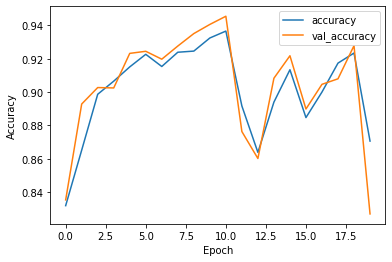

In [53]:
plt.plot(lstm_model_history.history['accuracy'])
plt.plot(lstm_model_history.history['val_accuracy'])
plt.legend(["accuracy","val_accuracy"])
plt.xlabel('Epoch')
plt.ylabel('Accuracy')

Text(0, 0.5, 'Loss')

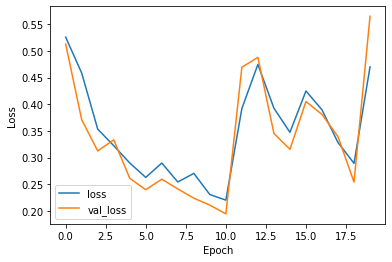

In [55]:
plt.plot(lstm_model_history.history['loss'])
plt.plot(lstm_model_history.history['val_loss'])
plt.legend(["loss","val_loss"])
plt.xlabel('Epoch')
plt.ylabel('Loss')